# 분류(classification)

감독학습의 큰 두 줄기는 회귀와 분류이다. 회귀는 데이터의 상관관계를 기반으로 하여 출력 데이터의 연속적인 값을 예측하는 것이다. 이와는 달리 그 결과가 수치화되기 어려운 데이터가 존재한다. 예를 들어 여러 기상조건을 기준으로 비가 올것인가 안올것인가를 예측하는 문제들은 이를 수치화시키기 어렵다. 

이런 불연속적이고 유한적인 결과를 예측하는 문제를 분류(classification)이라고 표현한다. 



<br><br>
<hr style="height:3px">

# Logistic Regression

### 로지스틱 회귀분석의 개념 

우리가 배웠던 선형 회귀분석을 상기해보자. 주로 다음과 같은 분포를 다음과 같이 처리했던  기억이 날 것이다. 



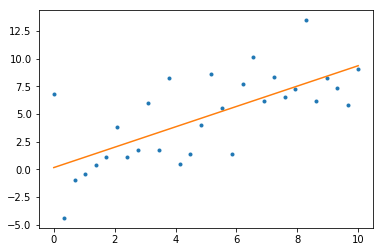

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model

x = np.linspace(0,10,30)
y = x + np.random.normal(0,3,30)
plt.plot(x,y,'.')

regr = linear_model.LinearRegression() 
regr.fit(x.reshape(30,1),y)
plt.plot(x, x * regr.coef_ + regr.intercept_)
plt.show()

이는 결국 어떤 데이터의 분포를 1차 방정식 $y = wx + \epsilon$ 로 표현하고자 하는 것이었다. 이는 선형회귀의 기본 철학이 <b> 결과값(종속변수)은 각 요소(독립변수)들간의 선형적 관계로부터 파생된다 </b> 는 해석으로 데이터를 분석하는 것이다. 

그러나 현실세계에서는 이런 방식으로 다루기 어려운 데이터가 존재한다. 대표적으로 결과값이 연속적이지 않고 두가지에 국한되는 경우를 생각해보자. 예를 들어 혈압과 사망여부의 관계같은 데이터는 사망하는가 사망하지 안는가 두가지 결과를 예측하여야 한다. 이는 얼추 다음과 같은 형태를 이룰 것이다. 



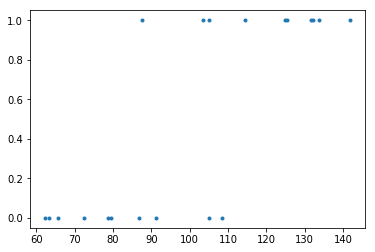

In [3]:
x = np.linspace(60,140,20) + np.random.normal(0,4,20)
y = np.array([0,0,0,0,0, 0,0,1,0,0, 1,0,1,1,1, 1,1,1,1,1])
plt.plot(x,y,'.')


이것을 선형회귀분석해봤자 다음과 같은 직선을 얻을 뿐이다. 

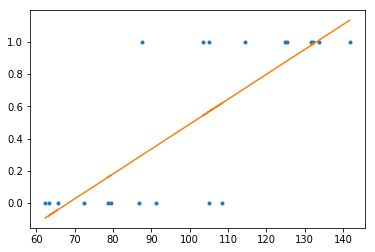

In [4]:
regr = linear_model.LinearRegression() 
regr.fit(x.reshape(20,1),y)
plt.plot(x,y,'.')
plt.plot(x, x * regr.coef_ + regr.intercept_)
plt.show()

과연 이것이 이 데이터를 올바르게 예측한다고 할 수 있을까? 무엇보다 결과가 0,1 범위를 넘어가는 순간 예측은 무의미해진다. 이를 예측하기 위해선 일반적인 $y = wx + \epsilon$  형식의 함수는 적합하지 안다. 이런 분포를 해석할 수 있는 수학적 모델이 과연 가능은 한걸까? 


### 로지스틱 함수

로지스틱 함수는 이런 종류를 데이터를 표현하기 위해 존재하는 함수이다. 

이 함수의 생김세는 다음과 같다.

$$ \frac{1}{1 + e^{-(wx+\epsilon)}} $$

w = 1 , e = 0 인 경우 이 함수를 그려보면 다음과 같은 모양이 생긴다. 

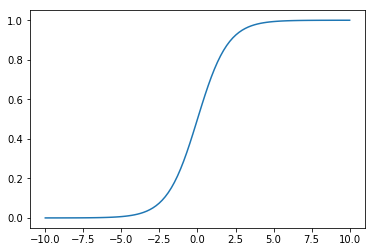

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
x = np.linspace(-10,10,100)
y = 1 / ( 1 + np.exp(-1*x + 0 ) )
plt.plot(x,y)
plt.show() 

이 함수는 그냥 0과 1을 구분하기 위해서 마구잡이로 만들어진 것이 아니다.  수학자들은 선형대수로 표현하기 힘든 0과 1의 분포를 표현하기 위해 확률 함수 $P(y=1|x)$ 의 개념으로 접근하였다.  이는 x 에 대해 y 가 1일 확률을 계산하는 함수이다. 실제로 혈압이 높아지면 사망 확률이 높아진다라는 가정을 해보면 x 는 값의 변화가 아니라 확률의 변화를 가져오게 되어 위의 예제와 같은 분포가 가능해진다. 문제는 어떻게 해야 우리가 가진 선형회귀의 개념을 확률함수로 바꿀 수 있는가이다. 

우선 다음 선형회귀 방식의 문제로서 범위가 다르다는 점에 주목하였다. 


 $$ P(y=1) = wx + \epsilon $$

즉 $P(y=1)$ 는 0~1 까지의 변화이므로 $-\infty -> \infty$ 인 선형 다항식과는 들어맞지 안는다. 그래서 다항식으로 구하는 함수가 0~1까지인 $P(y=1)$  가 아니라 $0 -> \infty$ 의 범위를 지니도록  $P(y=1) \div ( 1-P(y=1) )$ 를 구한다고 가정하였다. 

$$\frac{P(y=1)}{1-P(y=1)} => 0 \sim \infty $$

그러나 이 또한 $-\infty$ 의 범위를 커버하지는 못한다. 그래서 여기에 log 를 추가한다. 

$$log(\frac{P(y=1)}{1-P(y=1)}) => -\infty \sim \infty $$

만일 우리가 $log(\frac{P(y=1)}{1-P(y=1)}) = wx + \epsilon$를 구하면 다음과 같이 $P(y=1)$ 를 구할 수 있다. $wx + \epsilon$를 $a$ 라고 가정할때 .. 


$$ log(\frac{P}{1-P}) = a $$

$$ \frac{P}{1-P} = e^a $$

$$ \frac{1-P}{P} = \frac{1}{e^a} $$

$$ \frac{1}{P} - 1 = \frac{1}{e^a} $$

$$ \frac{1}{P} = e^{-a} + 1$$

$$ P = \frac{1}{1 + e^{-a}} $$

유도과정을 굳이 다 이해할 필요는 없다. 다만 $log(\frac{P}{1-P})$ 에 상응하는  $wx + \epsilon$를 회귀분석으로 구할 수 있으면 이 $w$ 와 $\epsilon$ 을 이용하여 다음과 같은 $P(y=1)$ 를 구할 수 있다는 것만 알아두면 된다. 

$$ \large P(y=1|x) = \frac{1}{1 + e^{-(wx+\epsilon)}} $$

이것이 그 유명한 로지스틱 함수이다. 엄청 복잡했지만 요컨데 다항식을 확률함수로 바꿔주는 마법의 모형이라고 생각하면 될듯 하다. 

그러면 지금까지 해왔듯이 이것을 다차항처럼 이것을 선형 회귀분석에 넣고 돌리면 바로 확률모델에 맞는 w와 e를 얻어서 바로 분류기가 생기겠구나 하고 생각하기 쉽지만 이 함수는 선형회귀의 기반이 되는 연산에 안맞는다고 한다. 그래서 이 경우는 각 수치를 조금씩 변화시켜 에러를 최적화도록 수렴시키는 방법을 사용한다. 
